# TP Natural Language Processing (NLP)

In [29]:
import pandas as pd
import string

# NTLK
## installation : "pip install nltk" ou "conda install -c anaconda nltk"
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

## 1. Importation et mise en forme des données

### Importation des données

In [2]:
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

#concaténation des données des 5 fichiers
df = pd.concat([df1,df2,df3,df4,df5]) 

In [3]:
df.head()

COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1

### Sélection de colonnes

In [4]:
df = df[['CONTENT', 'CLASS']].copy()
# on ne s'intéresse qu'au commentaire et au label associé (0=ham, 1=spam)

In [5]:
df.head()

CONTENT  CLASS
0  Huh, anyway check out this you[tube] channel: ...      1
1  Hey guys check out my new channel and our firs...      1
2             just for test I have to say murdev.com      1
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿      1
4            watch?v=vtaRGgvGtWQ   Check this out .﻿      1

#### les données sont-elles équilibrées ?
(Y a-t-il autant de données dans une classe que dans l'autre)

In [6]:
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

Oui, nous avons des classes plutôt équilibrées

# Preprocessing

## 2. Préprocessing sur un commentaire sélectionné

In [7]:
comment_ex = df['CONTENT'].iloc[1]

### Normalisation du texte
Tout mettre en minuscule

In [8]:
print('commentaire original : ', comment_ex)
print('commentaire normalisé : ', comment_ex.lower())

commentaire original :  Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
commentaire normalisé :  hey guys check out my new channel and our first vid this is us the  monkeys!!! i'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!


In [9]:
comment_ex = comment_ex.lower()

### Tokénization

In [10]:
#nltk.download('punkt')

In [11]:
tokens_ex = word_tokenize(comment_ex)
print(tokens_ex)

['hey', 'guys', 'check', 'out', 'my', 'new', 'channel', 'and', 'our', 'first', 'vid', 'this', 'is', 'us', 'the', 'monkeys', '!', '!', '!', 'i', "'m", 'the', 'monkey', 'in', 'the', 'white', 'shirt', ',', 'please', 'leave', 'a', 'like', 'comment', 'and', 'please', 'subscribe', '!', '!', '!', '!']


### Suppression de stopwords

In [12]:
#nltk.download('stopwords')

Liste de stopwords en anglais déjà présente dans NLTK

In [13]:
stopWord = stopwords.words('english')

In [14]:
print('nombre de stopwords : ', len(stopWord))
print('10 premiers stopwords : ', stopWord[:10])

nombre de stopwords :  179
10 premiers stopwords :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


Ajout des ponctuations dans cette liste

In [15]:
punctuation_list = set(string.punctuation)
stopWord.extend(punctuation_list)

In [16]:
tokens_ex = [word for word in tokens_ex if word not in stopWord]

In [17]:
tokens_ex

['hey',
 'guys',
 'check',
 'new',
 'channel',
 'first',
 'vid',
 'us',
 'monkeys',
 "'m",
 'monkey',
 'white',
 'shirt',
 'please',
 'leave',
 'like',
 'comment',
 'please',
 'subscribe']

### Lemmatization (ou Stemming)

In [18]:
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

In [19]:
lemma = WordNetLemmatizer()

In [20]:
lemma_tokens_ex = [lemma.lemmatize(word, 'v') for word in tokens_ex]
print('Mots qui ont changés :',[(a, b) for a, b in zip(tokens_ex, lemma_tokens_ex) if a!=b])

Mots qui ont changés : [('guys', 'guy'), ('monkeys', 'monkey')]


La fonction lemmatize a un parmètre "pos" qui peut prendre les valeurs suivantes selon le type de mot :
- "v" pour les verbes
- "n" pour les noms,
- "a" pour les adjectifs ...

## 3. Fonction pour réaliser le préprocessing

In [21]:
def preprocess(comment) :
    #normalisation + tokénization
    tokens = word_tokenize(comment.lower())
    ###suppression des stopwords
    tokens = [word for word in tokens if word not in stopWord]
    #lemmatization
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(w, 'v'),'n'),'a') for w in tokens]
    return ' '.join(tokens)

In [22]:
sentence = "The striped bats are hanging on their feet for best"
preprocess(sentence)

'strip bat hang foot best'

In [23]:
df['CONTENT'] = df.CONTENT.apply(lambda comment : preprocess(comment))

In [24]:
df['CONTENT']

0               huh anyway check tube channel kobyoshi02
1      hey guy check new channel first vid u monkey '...
2                                    test say murdev.com
3                      shake sexy as channel enjoy ^_^ ﻿
4                           watch v=vtarggvgtwq check .﻿
                             ...                        
365                             love song sing camp time
366    love song two reason 1.it africa 2.i bear beau...
367                                                  wow
368                                     shakira u wiredo
369                                  shakira best dancer
Name: CONTENT, Length: 1956, dtype: object

In [25]:
df['CONTENT'].iloc[1]

"hey guy check new channel first vid u monkey 'm monkey white shirt please leave like comment please subscribe"

# Classification

## 4. TFIDF
-> représente les mots d’un document à l’aide d’une matrice de nombres

In [26]:
vectorizer = TfidfVectorizer(analyzer='word') 
tfidf_mat = vectorizer.fit_transform(df.CONTENT)
feature_names = vectorizer.get_feature_names() #nom des tokens

# transforme la matrice en dataframe
dense = tfidf_mat.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2.head()

00  000  002  018   02  034   04  047000   05  053012  ...  ｃｏｍｍｅｎｔ  ｄａｍｎ  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0  ...      0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0  ...      0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0  ...      0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0  ...      0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0     0.0  ...      0.0   0.0   

   ｅｂａｙ  ｆａｎｃy  ｈｔｔｐ   ｉｓ  ｓｈｏｅｃｏｌｌｅｃｔｏｒ314  ｔｈｉｓ  ｕｓｒ  ｗｗｗ  
0   0.0    0.0   0.0  0.0               0.0   0.0  0.0  0.0  
1   0.0    0.0   0.0  0.0               0.0   0.0  0.0  0.0  
2   0.0    0.0   0.0  0.0               0.0   0.0  0.0  0.0  
3   0.0    0.0   0.0  0.0               0.0   0.0  0.0  0.0  
4   0.0    0.0   0.0  0.0               0.0   0.0  0.0  0.0  

[5 rows x 3975 columns]

Nous ne voyons ici beaucoup de zéros, c'est normal puisque sur ces 3975 tokens, seuls quelques-uns sont présent dans beaucoup de commentaires.

## 5. SVM

X (feature matrix) = df2

y (target vector) = df.CLASS

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df2, df.CLASS, test_size=0.3)
# on apprend sur 70% des données et test sur 30% 

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('accuracy',accuracy_score(y_test, y_pred))

accuracy 0.9369676320272572


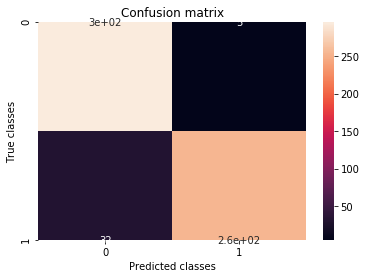

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title ('Confusion matrix')
plt.show()